In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
fpath = '/kaggle/input/santa-workshop-tour-2019/family_data.csv'
data = pd.read_csv(fpath, index_col='family_id')
data.head()

In [ ]:
fpath = '/kaggle/input/santa-workshop-tour-2019/sample_submission.csv'
submission = pd.read_csv(fpath, index_col='family_id')
submission.head()

In [ ]:
MAX_NUM_PEOPLE = 300
MIN_NUM_PEOPLE = 125
MAX_NUM_DAYS = 100

family_size = data[['n_people']].to_dict()['n_people']
temp_choice = [f'choice_{i}' for i in range(10)]
choices = data[temp_choice].to_dict()

days = list(range(MAX_NUM_DAYS,0,-1))

In [ ]:
def calculate_cost(value):

    cost_penalty = 0

    # count the number of people scheduled each day
    daily_num_people = {k:0 for k in days}
    
    # loop over each family; d is the day for each family f
    for f, d in enumerate(value):

        # make simpler variable names using look up dictionary
        num_people = family_size[f]
        choice_0 = choices['choice_0'][f]
        choice_1 = choices['choice_1'][f]
        choice_2 = choices['choice_2'][f]
        choice_3 = choices['choice_3'][f]
        choice_4 = choices['choice_4'][f]
        choice_5 = choices['choice_5'][f]
        choice_6 = choices['choice_6'][f]
        choice_7 = choices['choice_7'][f]
        choice_8 = choices['choice_8'][f]
        choice_9 = choices['choice_9'][f]

        # add the family member count to the daily number of visitors
        daily_num_people[d] += num_people

        # calculate the penalty according to the rules
        if d == choice_0:
            cost_penalty += 0
        elif d == choice_1:
            cost_penalty += 50
        elif d == choice_2:
            cost_penalty += 50 + 9 * num_people
        elif d == choice_3:
            cost_penalty += 100 + 9 * num_people
        elif d == choice_4:
            cost_penalty += 200 + 9 * num_people
        elif d == choice_5:
            cost_penalty += 200 + 18 * num_people
        elif d == choice_6:
            cost_penalty += 300 + 18 * num_people
        elif d == choice_7:
            cost_penalty += 300 + 36 * num_people
        elif d == choice_8:
            cost_penalty += 400 + 36 * num_people
        elif d == choice_9:
            cost_penalty += 500 + 36 * num_people + 199 * num_people
        else:
            cost_penalty += 500 + 36 * num_people + 398 * num_people

            
    # for each date, check total occupancy using soft constraints
    for _, v in daily_num_people.items():
        if (v > MAX_NUM_PEOPLE) or (v < MIN_NUM_PEOPLE):
            cost_penalty += 100000000


    # calculate accounting cost
    cost_accounting = (daily_num_people[days[0]]-125.0) / 400.0 * daily_num_people[days[0]]**(0.5)
    cost_accounting = max(0, cost_accounting)
    
    # loop over the remaining days and keep track of previous count
    num_yesterday = daily_num_people[days[0]]
    for day in days[1:]:
        num_today = daily_num_people[day]
        diff = abs(num_today - num_yesterday)
        cost_accounting += max(0, (daily_num_people[day]-125.0) / 400.0 * daily_num_people[day]**(0.5 + diff / 50.0))
        num_yesterday = num_today

    cost_penalty += cost_accounting
    return cost_penalty

In [ ]:
# use sample values
default_value = submission['assigned_day'].tolist()
default_score = calculate_cost(default_value)

new_value = default_value.copy()
# loop over each family
for fam_id, _ in enumerate(default_value):
    # loop over each family's pick'
    for select in range(10):
        day = choices[f'choice_{select}'][fam_id]
        temp_value = new_value.copy()
        temp_value[fam_id] = day # add in the new pick
        if calculate_cost(temp_value) < default_score:
            new_value = temp_value.copy()
            default_score = calculate_cost(new_value)

submission['assigned_day'] = new_value
score = calculate_cost(new_value)
submission.to_csv(f'submission_{score}.csv')
print(f'Score: {score}')

# check results
submission.head(100)

# recursion and array-based sequences are used in this solution for optimisational purposes 

Scatter plot:

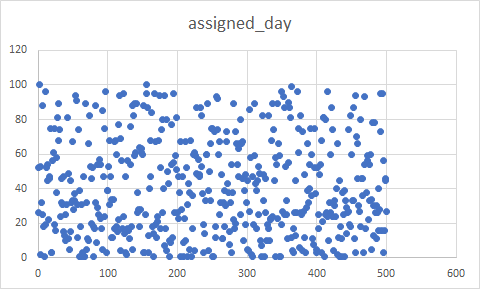